In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('DATA.csv')

In [3]:
df['Data_Value'] = df['Data_Value']/10

In [4]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['month_day'] = pd.to_datetime(df['Date']).dt.strftime('%m-%d')

df = df[df['month_day']!= '02-29']

In [5]:
tmax = df[(df['Year']>=2005) & (df['Year']<2015) & (df['Element'] == 'TMAX')].groupby('month_day')['Data_Value'].max()
tmin = df[(df['Year']>=2005) & (df['Year']<2015) & (df['Element'] == 'TMIN')].groupby('month_day')['Data_Value'].min()


tmax2015 = df[df['Year']==2015].groupby('month_day')['Data_Value'].max()
tmin2015 = df[df['Year']==2015].groupby('month_day')['Data_Value'].min()

TMAX2015 = tmax2015[tmax2015>tmax]
TMIN2015 = tmin2015[tmin2015<tmin]

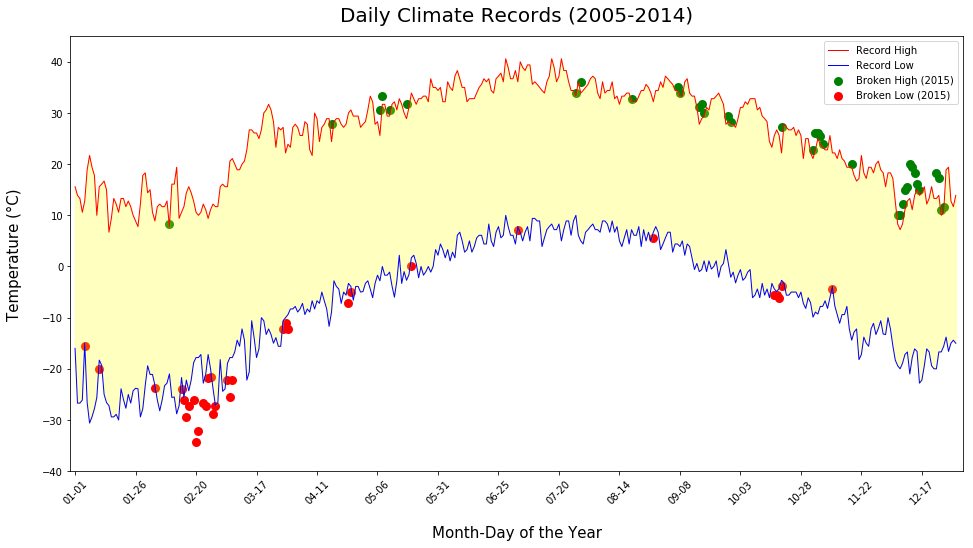

In [6]:
plt.figure(figsize = [16,8])
plt.plot(tmax, c = 'r', lw = 1, label = 'Record High')
plt.plot(tmin, c = 'b', lw = 1, label = 'Record Low')
plt.xticks(range(0,len(tmax), 25), tmax.index[range(0,len(tmax), 25)], rotation = 45)
ax = plt.gca()
ax.set_xlabel('Month-Day of the Year', labelpad = 20, size = 15)
ax.set_ylabel('Temperature (°C)', labelpad = 20, size = 15)
ax.set_title('Daily Climate Records (2005-2014)', size = 20)
plt.scatter(TMAX2015.index, TMAX2015, lw = 3, color = 'green', label = 'Broken High (2015)')
plt.scatter(TMIN2015.index, TMIN2015, lw = 3, color = 'red', label = 'Broken Low (2015)')
plt.legend()
plt.fill_between(tmax.index, tmax, tmin, color = 'yellow', alpha = .25)
ax.axis([-2,367, -40, 45])
ax.title.set_position([.5, 1.02])
plt.savefig('Daily Climate Records (2005 - 2014) Viz')